## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
print(tf.__version__)

2.0.0-rc0


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
mnist = keras.datasets.fashion_mnist

In [25]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [28]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
np.max(X_train) , np.min(X_train) , np.mean(X_train)

(255, 0, 72.94035223214286)

In [30]:
np.max(y_train) , np.min(y_train) , np.mean(y_train)

(9, 0, 4.5)

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [16]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

In [40]:
print(y_train)
print(y_train[0])
class_names[y_train[0]]

[9 0 0 ... 3 0 5]
9


'ankle boot'

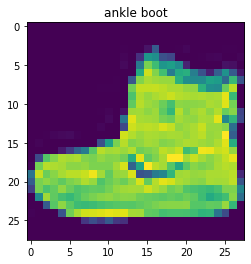

In [41]:
plt.figure()
plt.imshow(X_train[0])
plt.title(class_names[y_train[0]])
plt.show()

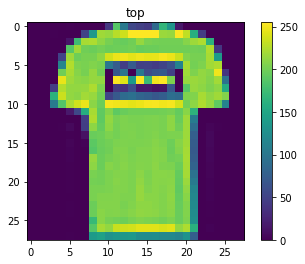

In [42]:
plt.figure()
plt.imshow(X_train[1])
plt.title(class_names[y_train[1]])
plt.colorbar()
plt.show()

In [43]:
X_train = X_train/255.0

In [44]:
X_test = X_test/255.0

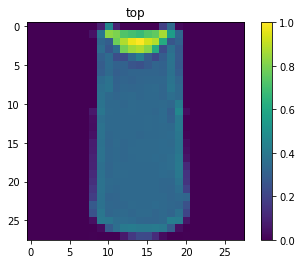

In [48]:
plt.figure()
plt.imshow(X_train[2])
plt.title(class_names[y_train[2]])
plt.colorbar()
plt.show()

### Build the model with TF 2.0 

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [50]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [51]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [54]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.fit(X_train, y_train, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4956 - accuracy: 0.8259
Epoch 2/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3713 - accuracy: 0.8658
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3365 - accuracy: 0.8776
Epoch 4/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3108 - accuracy: 0.8863
Epoch 5/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2926 - accuracy: 0.8922
Epoch 6/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2767 - accuracy: 0.8985
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2648 - accuracy: 0.9015
Epoch 8/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2544 - accuracy: 0.9045
Epoch 9/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2434 - accuracy: 0.9104
Epoch 10/20
6

In [56]:
model.fit(X_train, y_train, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1721 - accuracy: 0.9349
Epoch 2/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1676 - accuracy: 0.9367
Epoch 3/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1648 - accuracy: 0.9378
Epoch 4/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1606 - accuracy: 0.9402
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1580 - accuracy: 0.9409
Epoch 6/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1518 - accuracy: 0.9424
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1486 - accuracy: 0.9446
Epoch 8/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1459 - accuracy: 0.9455
Epoch 9/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1435 - accuracy: 0.9469
Epoch 10/20
60

In [57]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8888


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
y_pred = model.predict_classes(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.8888

In [64]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [67]:
pred = model.predict(X_test)

In [66]:
pred

array([[7.53501981e-18, 4.86645412e-20, 1.00454681e-12, ...,
        1.40432567e-05, 3.58620875e-14, 9.99985933e-01],
       [1.49547079e-04, 3.56905299e-20, 9.99681711e-01, ...,
        4.70831191e-31, 3.65250445e-21, 8.14416719e-18],
       [2.01698573e-20, 1.00000000e+00, 1.41273010e-22, ...,
        0.00000000e+00, 1.92511086e-30, 2.40101510e-32],
       ...,
       [1.43801630e-14, 1.37400302e-33, 2.76642750e-12, ...,
        4.97586117e-16, 1.00000000e+00, 1.29518695e-31],
       [5.99202771e-11, 9.99997854e-01, 4.22122892e-11, ...,
        1.09199375e-33, 3.14840658e-18, 4.79092569e-13],
       [9.59986273e-16, 8.17904364e-20, 7.01159139e-12, ...,
        5.10084697e-10, 3.91709495e-12, 2.30183689e-12]], dtype=float32)

In [40]:
pred[0]

array([1.67702035e-06, 1.03675714e-10, 1.47391557e-08, 1.43644374e-10,
       2.31243913e-08, 2.08095837e-04, 2.65245745e-07, 1.59264840e-02,
       9.40887389e-07, 9.83862460e-01], dtype=float32)

In [69]:
np.argmax(pred[0]) , np.argmax(pred[1]) , np.argmax(pred[10])

(9, 2, 4)

In [71]:
y_pred[0], y_pred[1] , y_pred[10]

(9, 2, 4)

In [72]:
#both are same 

#np.argmax(pred[0]) , np.argmax(pred[1]) , np.argmax(pred[10]) 

#or

#y_pred[0], y_pred[1] , y_pred[10]